In [168]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score as sil
import warnings
warnings.filterwarnings("ignore")

#  Import Dataset

In [169]:
# Load dataset
wine=pd.read_csv("wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# EDA

In [170]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [171]:
wine.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [172]:
wine.duplicated().sum()

0

In [173]:
wineData=wine.iloc[:,1:]

In [174]:
wineArray=wineData.values

In [175]:
wineArray

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# Scaling The Data

In [176]:
sc=MinMaxScaler()
sc.fit(wineArray)
wineData_array=sc.transform(wineArray)

In [177]:
wineData_array

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

# PCA

In [178]:
pca=PCA()
winePca=pca.fit_transform(wineData_array)

In [179]:
winePca

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [180]:
pca.components_

array([[-1.33367664e-01,  2.48515807e-01, -7.39167565e-04,
         1.77838621e-01, -8.86572802e-02, -3.95070868e-01,
        -4.14589792e-01,  3.33108614e-01, -2.52902105e-01,
         9.23290406e-02, -2.51137258e-01, -4.73492101e-01,
        -2.86862112e-01],
       [-5.50883679e-01, -2.27390577e-01, -1.63091200e-01,
         7.97763293e-02, -1.88165658e-01, -7.41447292e-02,
        -1.00692215e-03, -9.96036899e-03, -3.14178847e-02,
        -5.19707496e-01,  2.37206223e-01,  2.15562246e-01,
        -4.43888361e-01],
       [-8.38483848e-02,  4.92039271e-01,  4.03009367e-01,
         4.77242411e-01,  6.55069647e-03,  2.53065140e-01,
         1.96105456e-01,  2.85981862e-01,  2.28342345e-01,
        -3.30999741e-02, -1.06588781e-01,  2.97776289e-01,
        -1.51968292e-01],
       [-4.03281504e-02,  4.86032016e-01, -2.41975652e-01,
        -8.16939916e-02,  1.58801742e-02, -5.26432313e-02,
        -2.70332340e-02, -7.09095281e-01,  7.65736687e-02,
        -2.63220354e-02, -3.52498013e

In [181]:
Var=pca.explained_variance_ratio_

In [182]:
Var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

<BarContainer object of 13 artists>

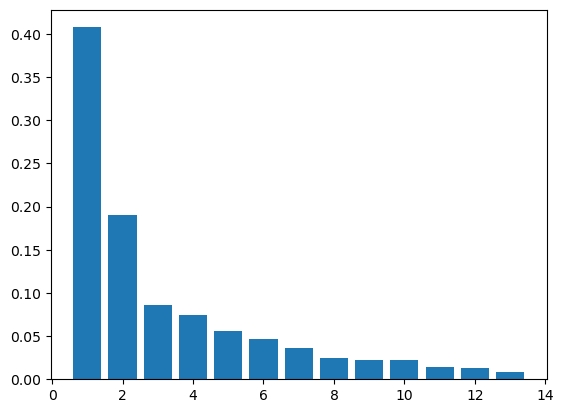

In [183]:
plt.bar(range(1,len(Var)+1),Var)

In [184]:
#cumulative Variance
Var1=np.cumsum(np.round(Var,decimals=4)*100)

In [185]:
Var1

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

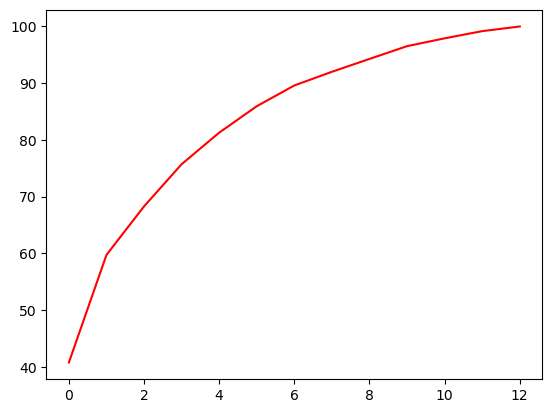

In [186]:
# Variance plot for PCA components obtained 
plt.plot(Var1,color="red")

In [187]:
wineData.shape

(178, 13)

In [188]:
winePca.shape

(178, 13)

In [189]:
Final_wine=pd.concat([pd.DataFrame(winePca[:,0:3],columns=['PC1','PC2','PC3']),wine[["Type"]]],axis=1)

In [190]:
Final_wine

,PC1,PC2,PC3,Type
0,-0.706336,-0.253193,0.024093,1
1,-0.484977,-0.008823,-0.280482,1
2,-0.521172,-0.189187,0.196217,1
3,-0.821644,-0.580906,0.081110,1
4,-0.202546,-0.059467,0.300240,1
...,...,...,...,...
173,0.739510,-0.471901,0.209360,3
174,0.581781,-0.348366,0.083590,3
175,0.626313,-0.546857,-0.030495,3
176,0.572991,-0.425516,-0.094537,3


In [219]:
Final_wine.shape

(178, 4)

# Herarchical Clustering

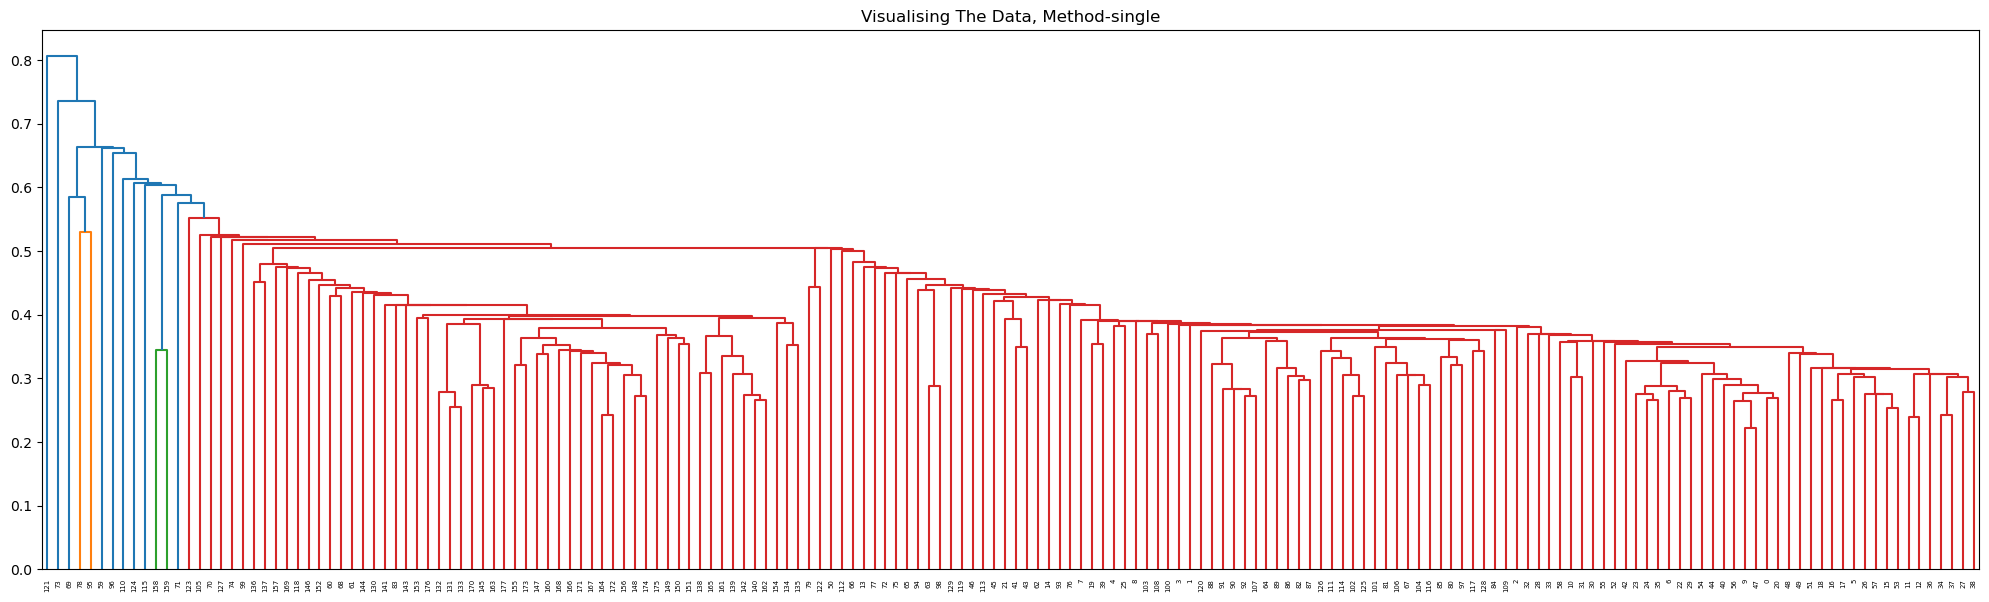

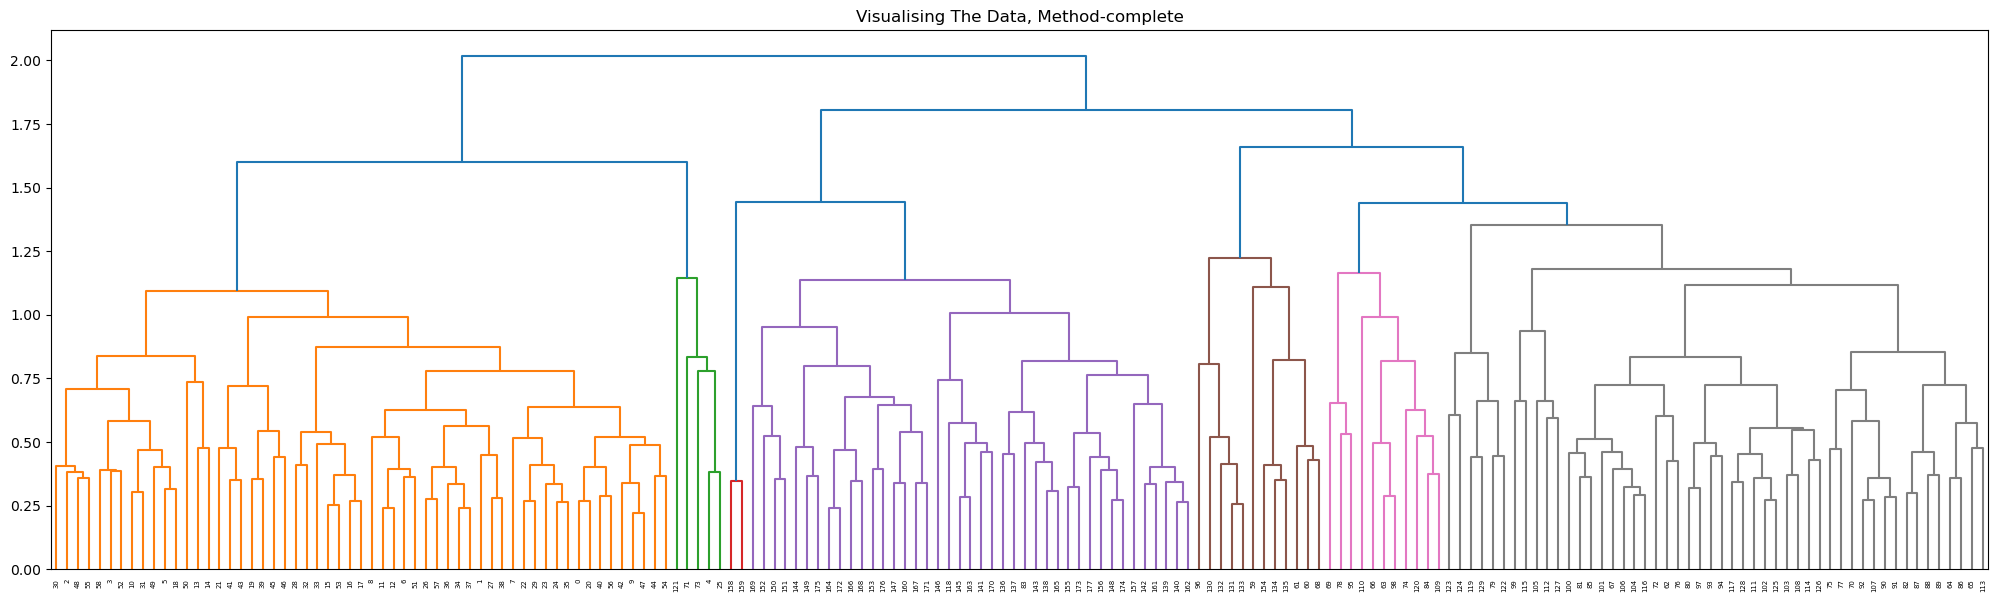

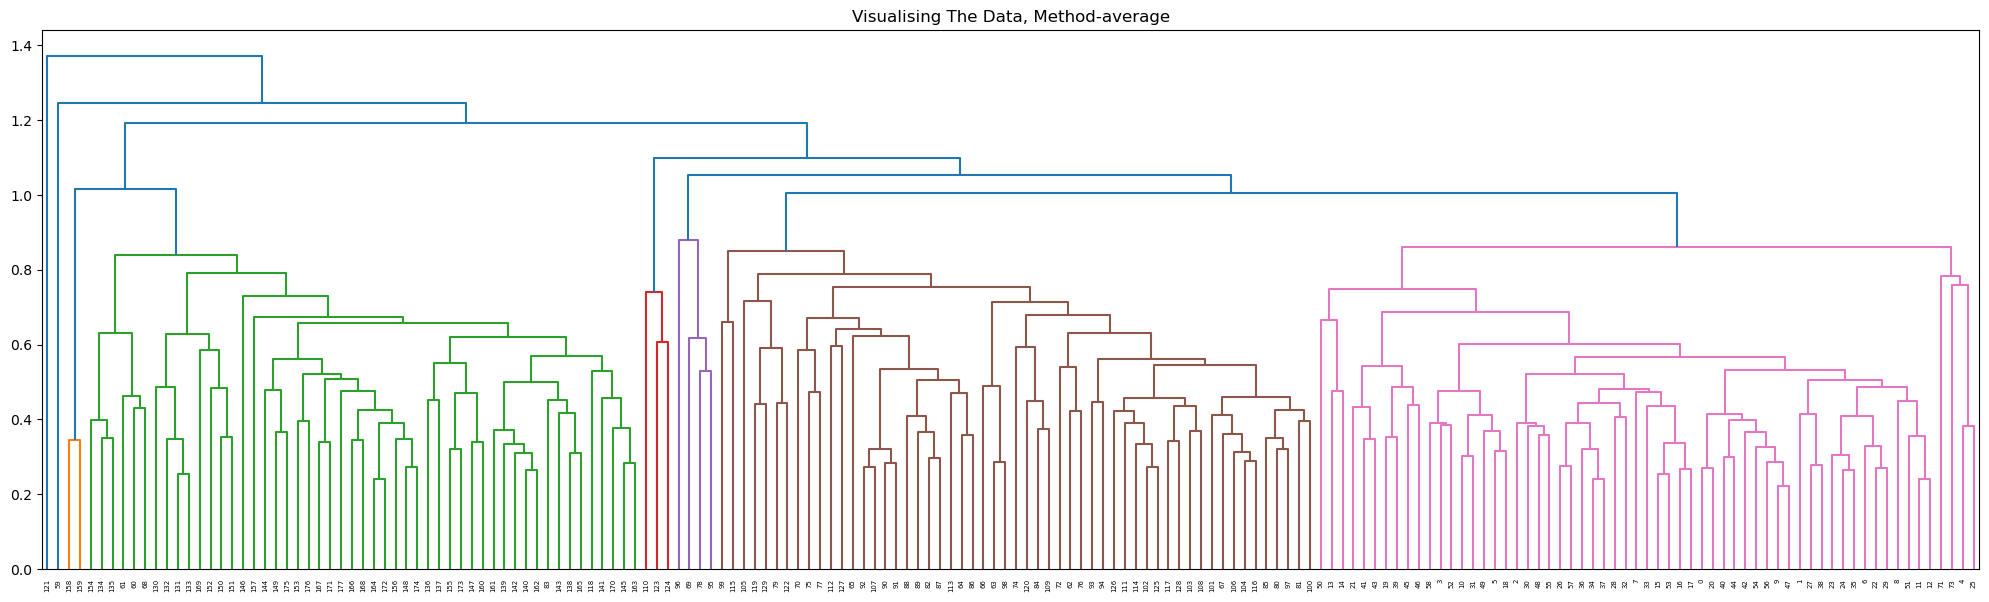

In [191]:
# Create dendrogram of Normalized data for all methots 
for methods in ['single','complete','average']:
    plt.figure (figsize=(25,7))
    plt.title('Visualising The Data, Method-{}'.format(methods))
    Dendrogram =sch.dendrogram(sch.linkage(wineData_array,method=methods,optimal_ordering=False))

In [192]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]
for i in nc:
    hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='complete')
    y=hc.fit_predict(wineData_array)
    sc_score.append(sil(wineData_array,y))

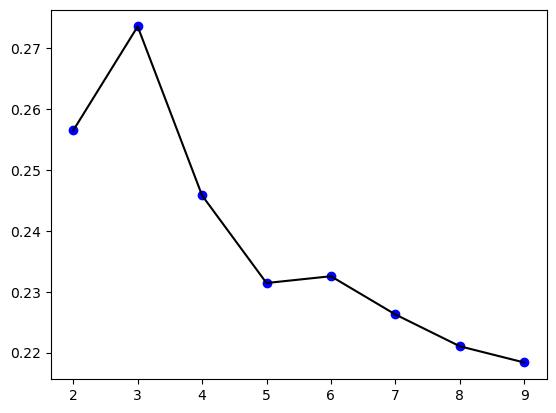

In [193]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="blue")
plt.show()

In [194]:
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hclusters
y_hc=hclusters.fit_predict(wineData_array)

In [195]:
wine1=wine

In [196]:
wine1['Norm_hcluster']=y_hc

In [197]:
wine1['Norm_hcluster'].value_counts()

0    73
1    62
2    43
Name: Norm_hcluster, dtype: int64

In [198]:
wine1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Norm_hcluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


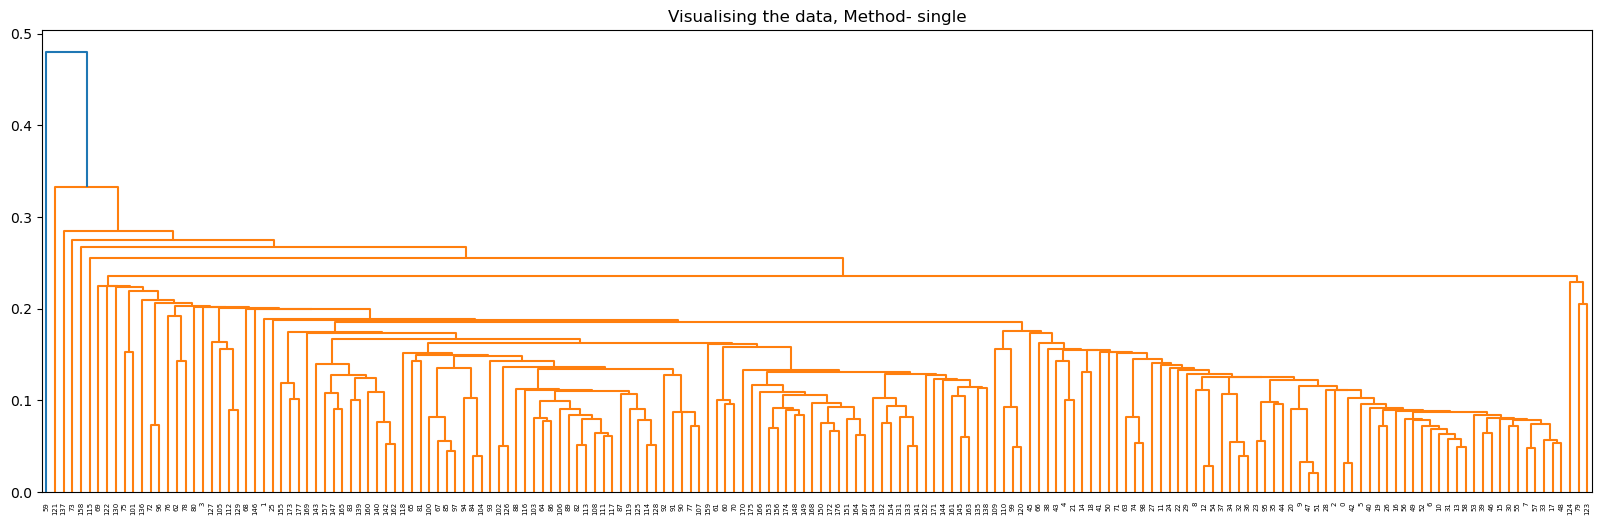

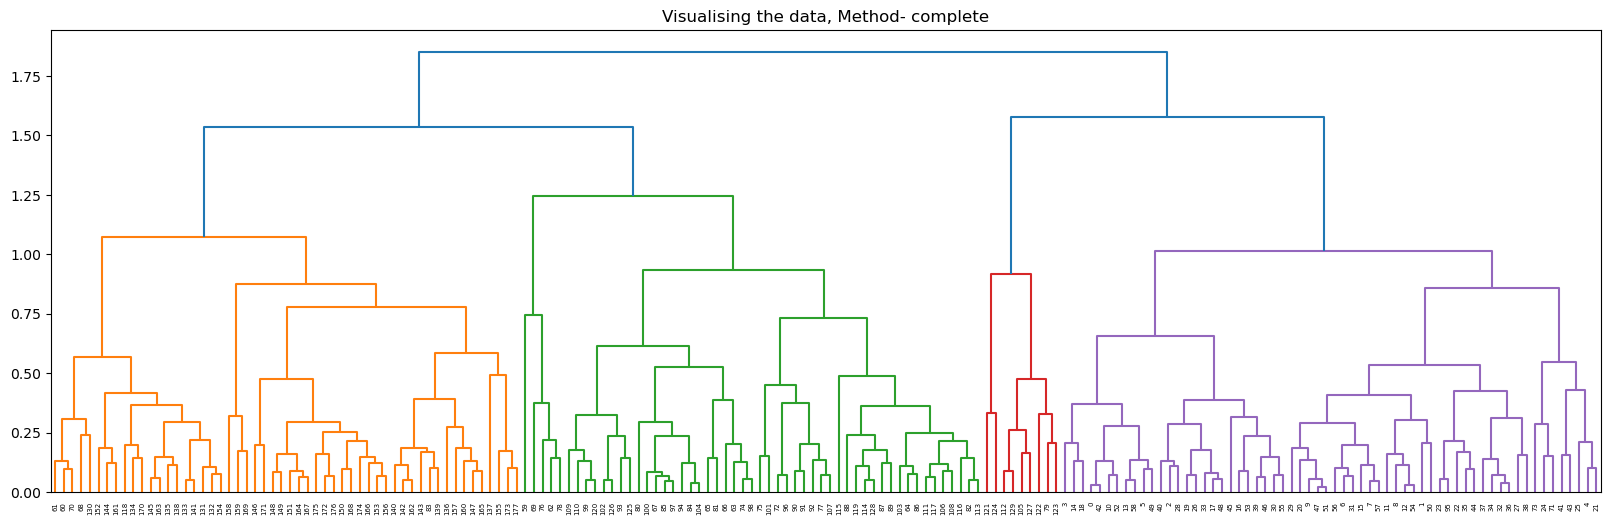

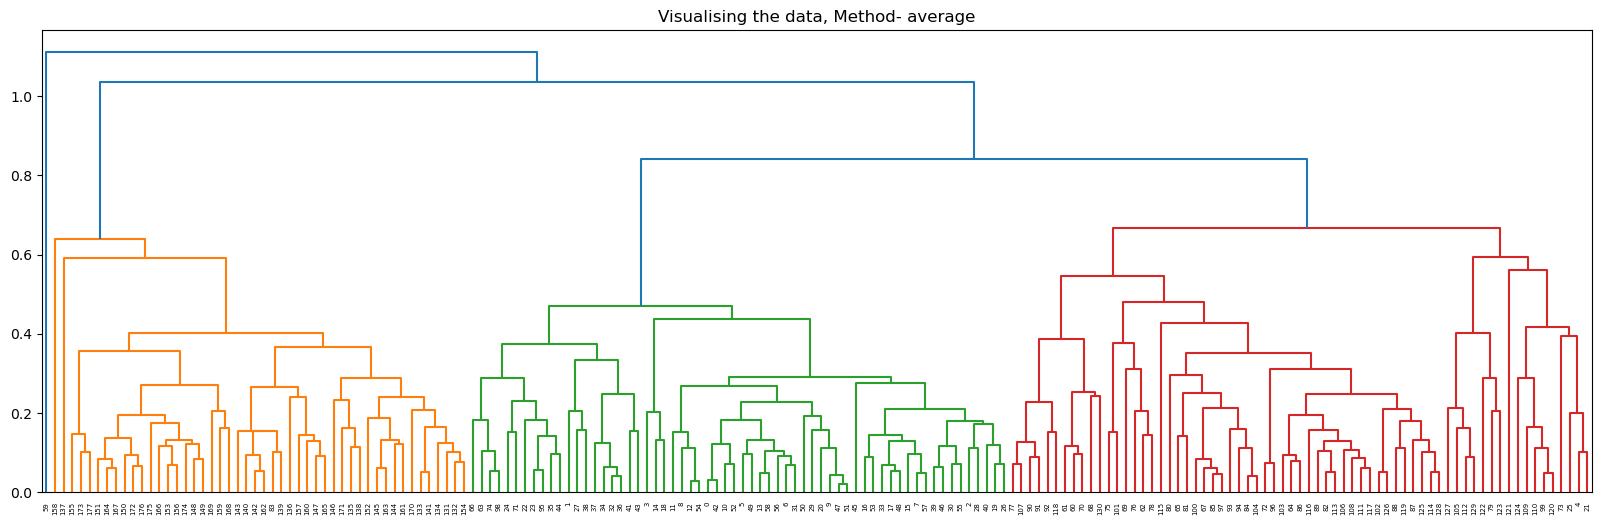

In [199]:
# Create dendrogram of pca data for all methots 
for methods in ['single','complete','average']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(Final_wine.iloc[:,0:3], method = methods,optimal_ordering=False))

In [200]:
nc1=[2,3,4,5,6,7,8,9]
sc_score1=[]    
for i in nc1:
    hc1 = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc1.fit_predict(wineData_array)
    sc_score1.append(sil(Final_wine.iloc[:,0:3],y))

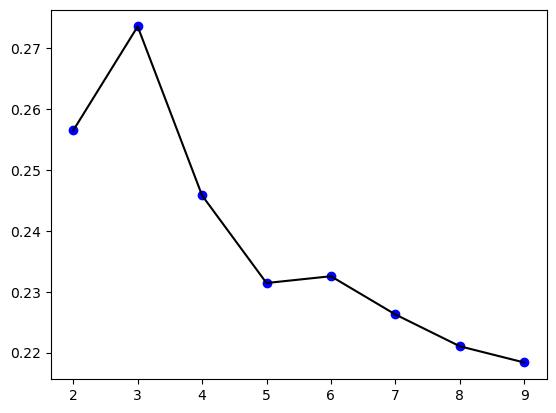

In [201]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="Blue")
plt.show()

In [202]:
hclusters1=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
y_hc=hclusters1.fit_predict(Final_wine.iloc[:,0:3])

In [203]:
wine2=wine

In [204]:
wine2['pca_hcluster']=y_hc

In [205]:
wine2['pca_hcluster'].value_counts()

0    107
1     62
2      9
Name: pca_hcluster, dtype: int64

In [206]:
print("PCA having 3 features:-\n ",wdf2['pca_hcluster'].value_counts())
print( "Norm:- \n",wdf['Norm_hcluster'].value_counts())

PCA having 3 features:-
  0    106
1     50
2     22
Name: pca_hcluster, dtype: int64
Norm:- 
 0    106
1     50
2     22
Name: Norm_hcluster, dtype: int64


# KMeans Clustering

In [207]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(wineData_array)
    iner.append(km.inertia_)

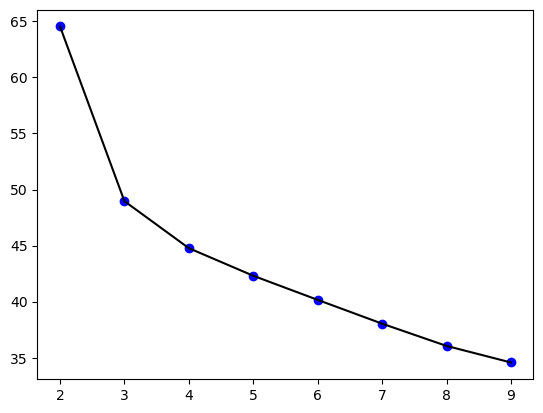

In [208]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="Blue")
plt.show()

In [209]:
model_kmeans = KMeans(n_clusters=3) 
model_kmeans.fit(wineData_array)

KMeans(n_clusters=3)

In [210]:
wine3=wine

In [211]:
wine3["Norm_KMclustering"]=pd.Series(model_kmeans.labels_)

In [212]:
wine3

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Norm_hcluster,pca_hcluster,Norm_KMclustering
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,0,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,0,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,0,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,0,0


In [213]:
wine3["Norm_KMclustering"].value_counts()

1    62
2    61
0    55
Name: Norm_KMclustering, dtype: int64

In [214]:
nc1=[2,3,4,5,6,7,8,9]
iner1=[]    
for i in nc1:
    km1=KMeans(i)
    km1.fit(Final_wine.iloc[:,0:3])
    iner1.append(km1.inertia_)

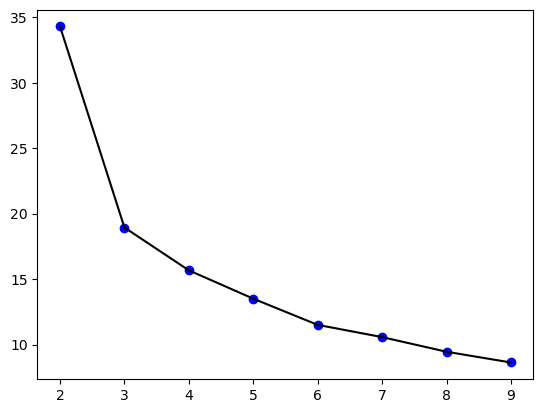

In [215]:
plt.plot(nc1,iner1,color="black")
plt.scatter(nc1,iner1,color="blue")
plt.show()

In [216]:
model1_kmeans = KMeans(n_clusters=3) 
model1_kmeans.fit(Final_wine.iloc[:,0:3])

KMeans(n_clusters=3)

In [217]:
wine4=wine
wine4["PCA_KMclustering"]=pd.Series(model1_kmeans.labels_)

In [218]:
wine4["PCA_KMclustering"].value_counts()

0    65
2    62
1    51
Name: PCA_KMclustering, dtype: int64